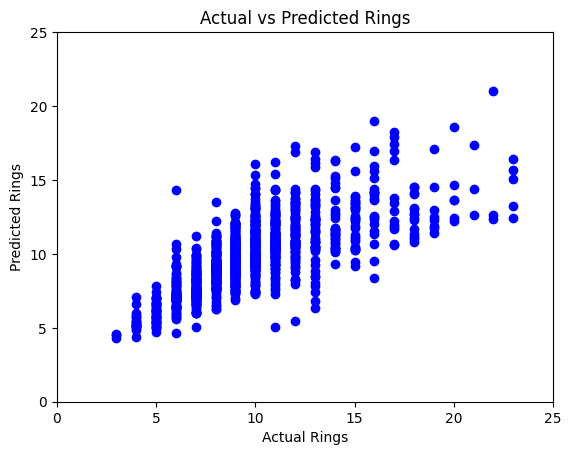

Model Intercept: 3.7966499811156105
Model Coefficients:
Length: 0.7115972651770007
Diameter: 10.113618944531359
Height: 10.089193605246532
Whole_weight: 9.967830690304844
Shucked_weight: -21.45865643772969
Viscera_weight: -10.76626369893803
Shell_weight: 7.958042689882971
Sex_I: -0.7840776511028373
Mean Squared Error (MSE): 4.78205262782827
Root Mean Squared Error (RMSE): 2.1867904855811564
Coefficient of Determination (R^2): 0.5290732589524783
Adjusted R^2: 0.5260472236686389


In [ ]:
# Data Science for Medicine and Biology
#
# Nezu Life Sciences
#
# Feel free to modify, redistribute and above all,
# create something with this code.
#
# Tiago Lopes, PhD
# March 2024

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Reads an input file into a data frame
filename = "https://raw.githubusercontent.com/Nezu-life/Data_Science_For_Medicine_and_Biology/main/datasets/abalone.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(filename)

# One-hot encoding
df = pd.get_dummies(df, columns=['Sex'], drop_first=True)

# Split the dataset into training and testing sets
y = df.pop('Rings')
X = df.iloc[:, :-1]  # All columns except the last one

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the values on the test set
y_pred = model.predict(X_test)


# Plot the actual and predicted values
plt.scatter(y_test, y_pred, color='blue')

# Set the scale for both axes from 0 to 25
plt.xlim(0, 25)
plt.ylim(0, 25)

plt.xlabel('Actual Rings')
plt.ylabel('Predicted Rings')
plt.title('Actual vs Predicted Rings')

# Show the plot
plt.show()

# Print model summary
print("Model Intercept:", model.intercept_)
print("Model Coefficients:")
for i, col in enumerate(X_train.columns):
    print(f"{col}: {model.coef_[i]}")


# Calculating and Printing Evaluation Measures
mse = mean_squared_error(y_test, y_pred)  # Change y to y_test
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)  # Change y to y_test
adjusted_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)  # Change y and X to y_test and X_test

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Coefficient of Determination (R^2): {r2}")
print(f"Adjusted R^2: {adjusted_r2}")
